In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from Constants import Constants

from rlof import RLOF,CircumbinaryTorus


%matplotlib inline

c = Constants()

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

# Circumbinary Torus


### Manual initialization

manually initializing CircumbinaryTorus with supplied params


/Users/morganmacleod/CODE/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


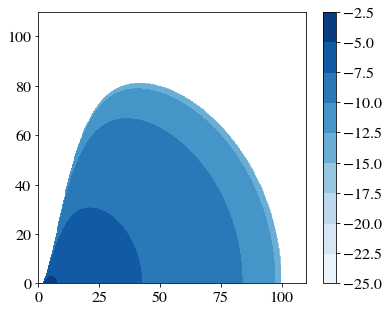

In [11]:
# manually initialize with settings to some parameters
ct = CircumbinaryTorus(GM=1,R0=100)

RR,zz = np.meshgrid(np.linspace(0,1.1*ct.R0,300),np.linspace(0,1.1*ct.R0,300))

plt.contourf(RR,zz, np.log10(ct.rho_torus(RR,zz)) ,cmap='Blues')
plt.colorbar()


# Based on RLOF Orbit Integration

In [12]:
r = RLOF(Md0=2.e33,
         Ma0=1.e33,
         Rd0=7e12,
         Ra0=0.0,
         Ggrav=6.674e-8,
         a0_mode='Roche_limit_fraction',
         f_roche_limit=0.9,
         gamma_adiabatic=5./3.,
         gamma_structure=5./3.,
         fcorot0=1.0)

sol = r.integrate(5*3.15e7,Ntimes=1001)

print(sol.keys())

=== RLOF: binary defined =======
('Md0 = ', 2e+33)
('Ma0 = ', 1e+33)
('Rd0 = ', 7000000000000.0)
('Ra0 = ', 0.0)
('a0 = ', 14318043924595.418)
('G = ', 6.674e-08)
----------donor star------------
('Md0 = ', 2e+33)
('Md(original) = ', 2e+33)
('Rd0 = ', 7000000000000.0)
('Rdfunc = ', <bound method RLOF.Rdfunc_constant of <rlof.RLOF instance at 0x120906488>>)
('fcorot0 = ', 1.0)
('gamma_adiabatic = ', 1.6666666666666667)
('gamma_structure = ', 1.6666666666666667)
---- integration ---------------
('solver message: ', 'A termination event occurred.')
('events: ', [array([1.22700583e+08])])
--------------------------------
['t', 'Md', 'Rd', 'Ma', 'Ra', 'a', 'dMddt']


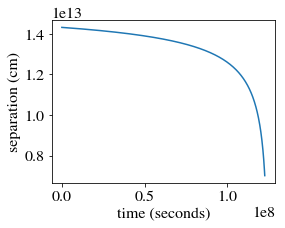

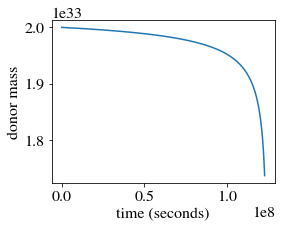

In [13]:
plt.figure(figsize=(4,3))
plt.plot(sol['t'],sol['a'])
plt.xlabel('time (seconds)')
plt.ylabel('separation (cm)')
plt.show()

plt.figure(figsize=(4,3))
plt.plot(sol['t'],sol['Md'])
plt.xlabel('time (seconds)')
plt.ylabel('donor mass')
plt.show()